### Importing the Important libraries and Framework

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization,MaxPooling2D,Conv2D
from keras.datasets import cifar100
                  

### Loading the Dataset and Spliting into Train and Test

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

* The Train Dataset contain 50000 images and Test dataset contain 10000 images.
* The 32 X 32 is the resolution of an image. Where 32 is width and 32 is height.
* And 3 is the RGB (Red, Green, Blue) color code.

### Exploring the Dataset

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def plot_sample(index):                 #Through this funcn we can see the ouput image in training dataset
    plt.figure(figsize = (15,3))
    plt.imshow(x_train[index])
    plt.title(classes[y_train[index][0]])
    plt.axis('off')

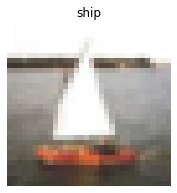

In [6]:
plot_sample(860)

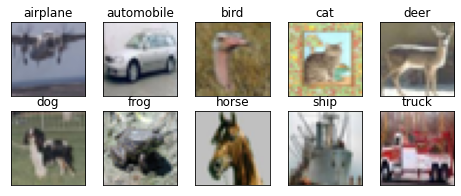

In [7]:
fig = plt.figure(figsize = (8,3))
for i in range(len(classes)):
    ax = fig.add_subplot(2,5,1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[ : ] == i)[0]
    feat = x_train[idx,::]
    img_number = np.random.randint(feat.shape[0])
    im = (feat[img_number,::])
    ax.set_title(classes[i])
    plt.imshow(im)
plt.show()

In [8]:
np.where(y_train[ : ]==9)[1]

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
x_train[1,::].shape

(32, 32, 3)

In [10]:
x_train[1].shape

(32, 32, 3)

### Encoding Target Variable

In [11]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

### Create the Model

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes)))
model.add(Activation('softmax'))


### Train the Neural Network

In [13]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255          # Normalize
x_test/=255


In [14]:
model.fit(x_train,y_train,
          batch_size=32,
          epochs=80,
          validation_data=(x_test,y_test),
          shuffle=True)

Epoch 1/80
1563/1563 [==============================] - 40s 5ms/step - loss: 8.1381 - accuracy: 0.3137 - val_loss: 6.1370 - val_accuracy: 0.4205
Epoch 2/80
1563/1563 [==============================] - 8s 5ms/step - loss: 4.8895 - accuracy: 0.4544 - val_loss: 3.8155 - val_accuracy: 0.5069
Epoch 3/80
1563/1563 [==============================] - 7s 5ms/step - loss: 3.1867 - accuracy: 0.5210 - val_loss: 2.6353 - val_accuracy: 0.5445
Epoch 4/80
1563/1563 [==============================] - 7s 5ms/step - loss: 2.2587 - accuracy: 0.5653 - val_loss: 1.9681 - val_accuracy: 0.5843
Epoch 5/80
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7367 - accuracy: 0.6013 - val_loss: 1.6573 - val_accuracy: 0.5938
Epoch 6/80
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4372 - accuracy: 0.6304 - val_loss: 1.3252 - val_accuracy: 0.6463
Epoch 7/80
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2633 - accuracy: 0.6564 - val_loss: 1.2435 - val_accuracy

### Mounting the Drive

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Saving the Model for future prediction

In [16]:
model.save('/content/drive/MyDrive/College Training 6th Sem/model.h5')